In [15]:
import os
import random
from pathlib import Path
from tqdm.auto import tqdm
import numpy as np
import pyvista as pv
from matplotlib import pyplot as plt

In [11]:
data_dir = Path("/home/max/Desktop/python_projects/SimJeb")
root = data_dir / "SimJEB_surfmesh"
dest = data_dir / "SimJEB_sdf"
metadata_dir = data_dir / "SimJEB_metadata"

In [24]:
split = 0.85

In [3]:
paths = []
for path in root.glob("*.obj"):
    paths.append(path)

In [4]:
pv_points_downsample = pv.read(data_dir / "SimJEB_metadata" / "all_points_1M.vtk")

In [5]:
neighbours_distances = []
names_list = []
for path in tqdm(paths):
    mesh = pv.read(path)
    mesh = mesh.interpolate(pv_points_downsample)
    neighbours_distances.append(np.quantile(mesh["neighbours_distance"], q=0.95))
    names_list.append(path.stem)

100%|█████████████████████████████████████████| 381/381 [03:14<00:00,  1.96it/s]


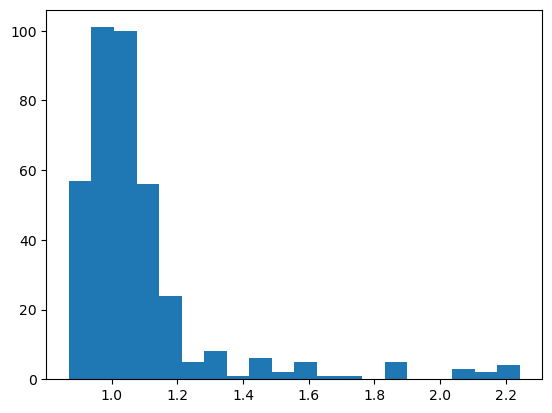

In [6]:
_ = plt.hist(neighbours_distances, bins=20)

In [7]:
mean, std = np.mean(neighbours_distances), np.std(neighbours_distances)

In [8]:
outiers_list = [
    n for d, n in zip(neighbours_distances, names_list) if np.abs(d - mean) > std
]

In [9]:
len(outiers_list)

34

In [10]:
mean, std

(1.0888479563007156, 0.23418807882920148)

In [12]:
with open(metadata_dir / "outliers.txt", "w") as f:
    f.writelines("\n".join(outiers_list))

In [13]:
outiers_set = set(outiers_list)

In [14]:
dataset = [n for n in names_list if n not in outiers_set]

In [16]:
random.shuffle(dataset)

In [25]:
split_int = int(len(dataset) * split)

In [26]:
train = dataset[:split_int]
test = dataset[split_int:]

In [27]:
with open(metadata_dir / "train.txt", "w") as f:
    f.writelines("\n".join(train))

In [28]:
with open(metadata_dir / "test.txt", "w") as f:
    f.writelines("\n".join(test))

In [29]:
len(train)

294

In [30]:
len(test)

53